In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# SPX= SPX stock value
# GLD= Gold Price
# USO= United State Oil Price
# SLV= Silver Price
# EUR/USD= Currency Pair

In [5]:
data.shape

(2290, 6)

In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
correlation =data.corr()
import seaborn as sns

C:\Users\Nimes\AppData\Local\Temp\ipykernel_2704\3655671495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =data.corr()


<Axes: >

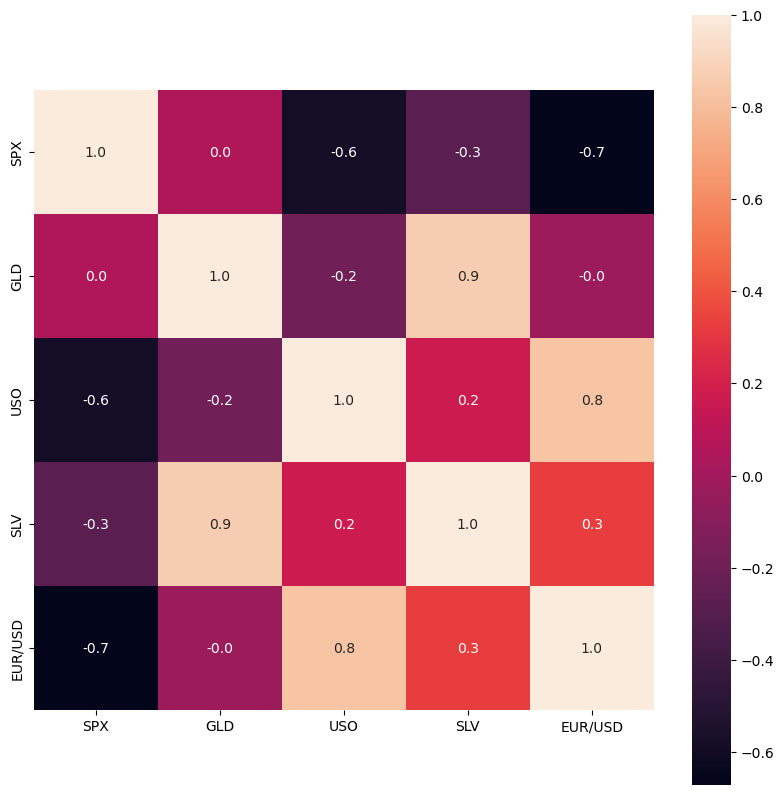

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True)

In [15]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

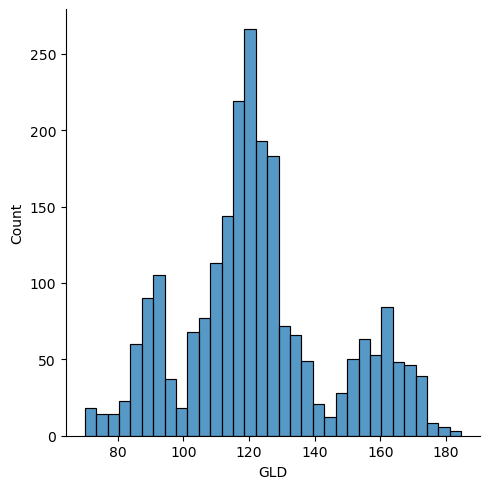

In [16]:
sns.displot(data['GLD'])

In [17]:
x=data.drop(['Date','GLD'],axis=1)

In [18]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [19]:
y=data['GLD']

In [20]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape


(1832, 4)

In [25]:
x_test.shape

(458, 4)

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
pred=model.predict(x_test)

In [30]:
pred

array([126.0593007 , 107.31729922, 158.89240075,  91.7370999 ,
       108.66699977, 111.64349977, 138.10760244, 116.44780016,
       105.67159962, 115.90560015, 119.01599968, 122.52949973,
       109.62669937, 118.96490017, 114.00560052, 159.88949971,
       168.56439948,  87.77809942, 160.99970047, 120.43719993,
       119.76060028, 120.44999936, 115.39810077,  76.65399901,
       133.87390029, 102.85419955, 127.00759968, 167.74719981,
       127.36759828, 123.06659818,  86.39980072, 124.98779898,
       108.56019857, 115.67670102, 120.29150127, 118.49610093,
       129.82440244, 113.33140043, 106.27540053, 125.00089954,
        95.59779822,  87.20700023, 115.02930146,  94.06730115,
       131.53079897, 121.32539946, 125.07759842, 124.13049929,
       154.77819938, 120.03100073, 172.19839815,  84.27530038,
       153.96330203, 117.95660053, 101.04300028, 143.01850092,
       163.10409777, 159.30350295, 120.15120025, 160.5166003 ,
        89.37700008,  82.37040035, 153.47079725,  92.46

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)


0.9887502086634382

In [34]:
#compare The actual values and predicted values in a plot

In [35]:
y_test=list(y_test)

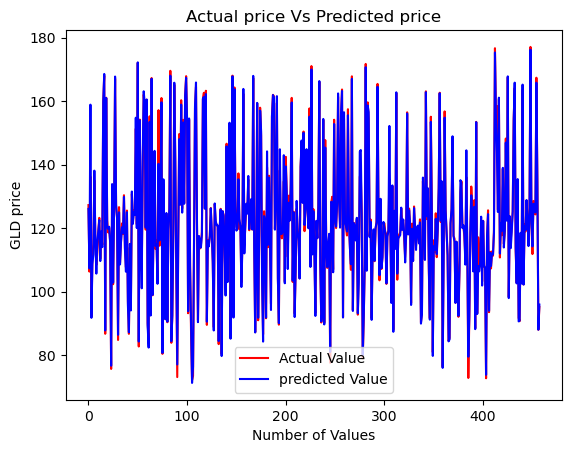

In [38]:
plt.plot(y_test,color='red',label="Actual Value")
plt.plot(pred,color='blue',label="predicted Value")
plt.title("Actual price Vs Predicted price")
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()